# Merced Fm detrital zircon analysis

In [1]:
import detritalpy
import detritalpy.detritalFuncs as dFunc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For improving matplotlib figure resolution

import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import kstest

## Plot distributions of Merced samples

Stratigraphic order of samples is:

- MF22-1 (lowest)
- MF22-18
- MF22-19
- MF22-16
- MF22-21
- MF22-22 (uppermost)

MF22-1, MF22-18, MF22-19 are demonstrably below the provenance change

MF22-16 is close to provenance change

MF22-21, MF22-22 are demonstrably above provenance change

In [2]:
zircon_dates = pd.read_excel('../data/detrital_zircon/MF_detrital_zircon_dates_round2.xlsx',
                            sheet_name=1)
zircon_dates.head()

,Sample_ID,Grain_ID,BestAge,BestAge_err
0,MF22-16,150,3.209515,0.169162
1,MF22-16,109,3.241730,0.108994
2,MF22-16,19,3.437466,0.174338
3,MF22-16,93,11.230444,0.371304
4,MF22-16,227,23.659996,0.578473


In [9]:
franciscan_zircon = pd.read_excel('../data/detrital_zircon/Franciscan_complex_compiled_dates.xlsx', sheet_name=0)
gerasimov_compilation = pd.read_excel('../data/detrital_zircon/Gerasimov_etal_compiled_dates.xlsx', sheet_name=0)
gerasimov_compilation

,Sample_ID,Grain_ID,BestAge,BestAge_err
0,Orinda Fm (OR24-1; this study),OR24-1_L_205,24.1,0.857
1,Orinda Fm (OR24-1; this study),OR24-1_S_437,81.8,3.320
2,Orinda Fm (OR24-1; this study),OR24-1_M_255,83.0,2.730
3,Orinda Fm (OR24-1; this study),OR24-1_M_211,84.8,1.950
4,Orinda Fm (OR24-1; this study),OR24-1_S_433,85.0,3.870
...,...,...,...,...
2887,"Sierra magmatic (Chapman et al., 2012)",Chapman-649,85.0,NaN
2888,"Sierra magmatic (Chapman et al., 2012)",Chapman-650,95.0,NaN
2889,"Sierra magmatic (Chapman et al., 2012)",Chapman-651,248.0,NaN
2890,"Sierra magmatic (Chapman et al., 2012)",Chapman-652,248.0,NaN


In [10]:
MF22_16_data = zircon_dates[zircon_dates['Sample_ID'] == 'MF22-16']
MF22_18_data = zircon_dates[zircon_dates['Sample_ID'] == 'MF22-18']
MF22_19_data = zircon_dates[zircon_dates['Sample_ID'] == 'MF22-19']
MF22_21_data = zircon_dates[zircon_dates['Sample_ID'] == 'MF22-21']
MF22_22_data = zircon_dates[zircon_dates['Sample_ID'] == 'MF22-22']
MF22_1_data = zircon_dates[zircon_dates['Sample_ID'] == 'MF22-1']

sierran_data = gerasimov_compilation[gerasimov_compilation['Sample_ID'] == 'Sierra magmatic (Chapman et al., 2012)']
greatvalley_data = gerasimov_compilation[gerasimov_compilation['Sample_ID'] == 'Great Valley Group (Sharman et al. 2015)']

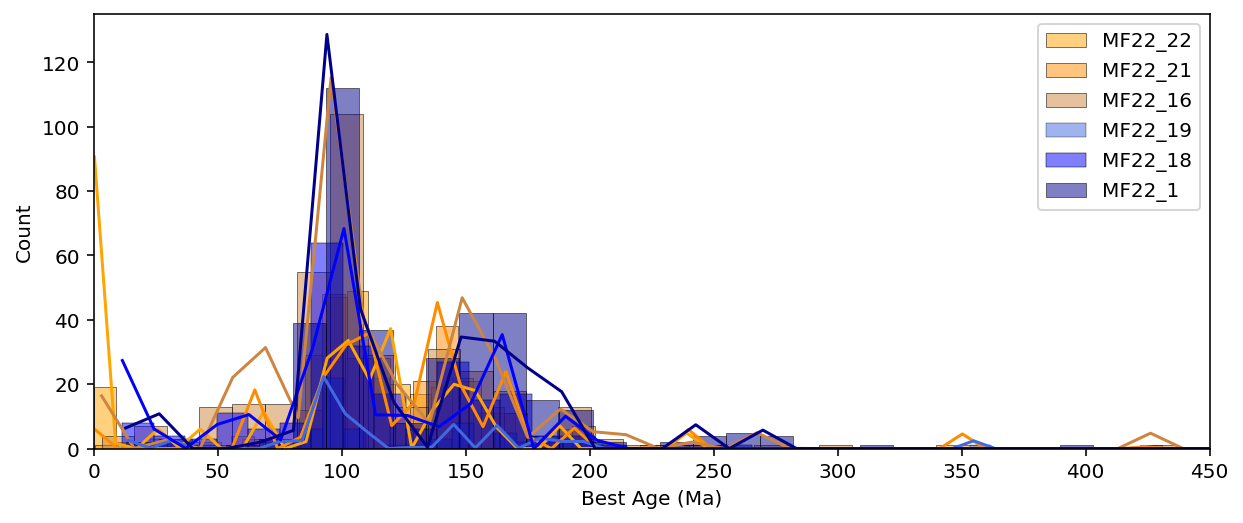

In [9]:
n_bin = 200

plt.figure(figsize=(10,4))

sns.histplot(MF22_22_data['BestAge'], bins=n_bin, kde=True, color='orange', label='MF22_22', kde_kws={'bw_adjust': 0.01})
sns.histplot(MF22_21_data['BestAge'], bins=n_bin, kde=True, color='darkorange', label='MF22_21', kde_kws={'bw_adjust': 0.01})
sns.histplot(MF22_16_data['BestAge'], bins=n_bin, kde=True, color='peru', label='MF22_16', kde_kws={'bw_adjust': 0.01})
sns.histplot(MF22_19_data['BestAge'], bins=n_bin, kde=True, color='royalblue', label='MF22_19', kde_kws={'bw_adjust': 0.01})
sns.histplot(MF22_18_data['BestAge'], bins=n_bin, kde=True, color='blue', label='MF22_18', kde_kws={'bw_adjust': 0.01})
sns.histplot(MF22_1_data['BestAge'], bins=n_bin, kde=True, color='darkblue', label='MF22_1', kde_kws={'bw_adjust': 0.01})

# sns.kdeplot(MF22_16_data['BestAge'], bw=0.01)
# sns.kdeplot(MF22_18_data['Best Age'], bw=0.01)

plt.xlabel('Best Age (Ma)')
plt.xlim(0, 450)
plt.legend()

plt.show()

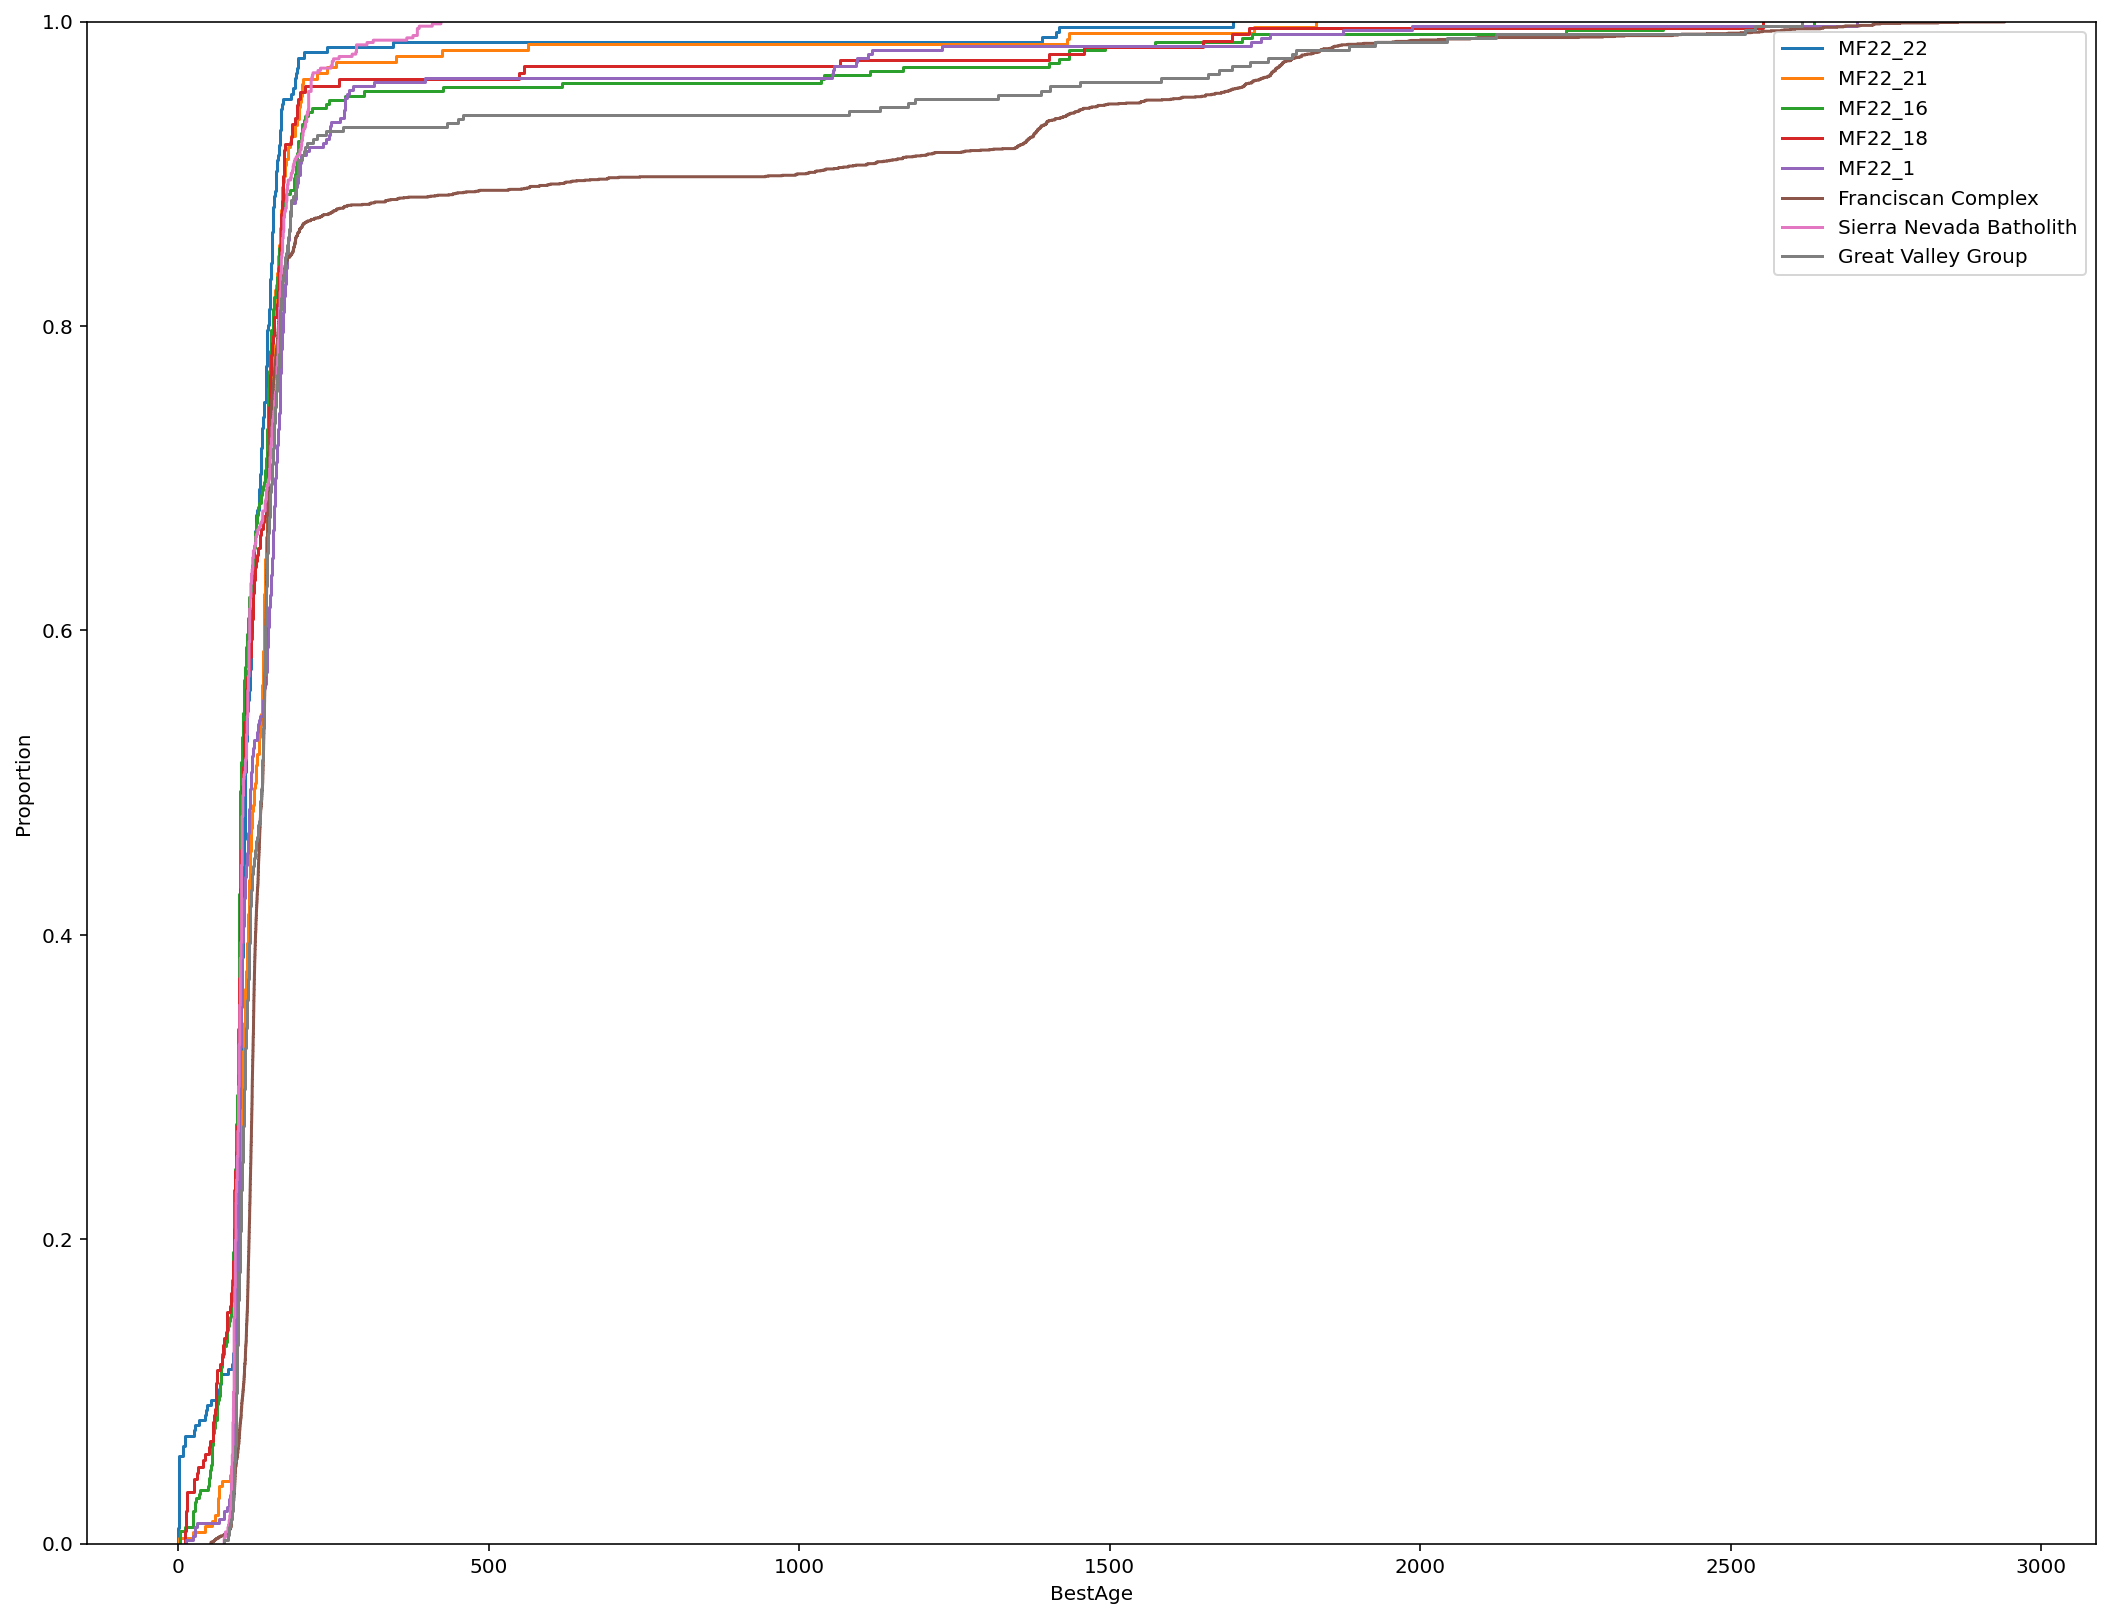

In [13]:
plt.figure(figsize=(18,14))
sns.ecdfplot(MF22_22_data['BestAge'], label='MF22_22')
sns.ecdfplot(MF22_21_data['BestAge'], label='MF22_21')
sns.ecdfplot(MF22_16_data['BestAge'], label='MF22_16')
#sns.ecdfplot(MF22_19_data['BestAge'], label='MF22_19')
sns.ecdfplot(MF22_18_data['BestAge'], label='MF22_18')
sns.ecdfplot(MF22_1_data['BestAge'], label='MF22_1')
sns.ecdfplot(franciscan_zircon['BestAge'], label='Franciscan Complex')
sns.ecdfplot(sierran_data['BestAge'], label='Sierra Nevada Batholith')
sns.ecdfplot(greatvalley_data['BestAge'], label='Great Valley Group')
#plt.ylim(0.6,1)
plt.legend()
plt.show()

In [16]:
kstest(MF22_21_data['BestAge'], MF22_1_data['BestAge'])

KstestResult(statistic=0.14823198580004388, pvalue=0.0018293453953016625)

## Use detritalPy to visualize detrital age distributions

In [37]:
dataToLoad = ['../data/detrital_zircon/MF_detrital_zircon_dates_round2.xlsx',
             '../data/detrital_zircon/Gerasimov_etal_compiled_dates.xlsx',
             '../data/detrital_zircon/Franciscan_complex_compiled_dates.xlsx']

main_df, main_byid_df, samples_df, analyses_df = dFunc.loadDataExcel(dataToLoad)

In [40]:
sampleList = [(['MF22-22'], 'MF22-22'), (['MF22-21'], 'MF22-21'), (['MF22-16'], 'MF22-16'), (['MF22-19'], 'MF22-19'), (['MF22-18'], 'MF22-18'), (['MF22-1'], 'MF22-1'), 
              (['Sierra magmatic (Chapman et al., 2012)'], 'Sierra magmatic'),
              (['Great Valley Group (Sharman et al. 2015)'], 'Great Valley group'), 
              (['Franciscan Complex (Prohoroff et al. 2012)','Franciscan Complex (Snow et al. 2010)', 
                'Franciscan Complex (Apen et al. 2021)', 'Franciscan Complex (Bero et al., 2020)'], 'Franciscan Complex')]

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '2sigma')

In [33]:
matplotlib.rcParams['pdf.fonttype'] = 42

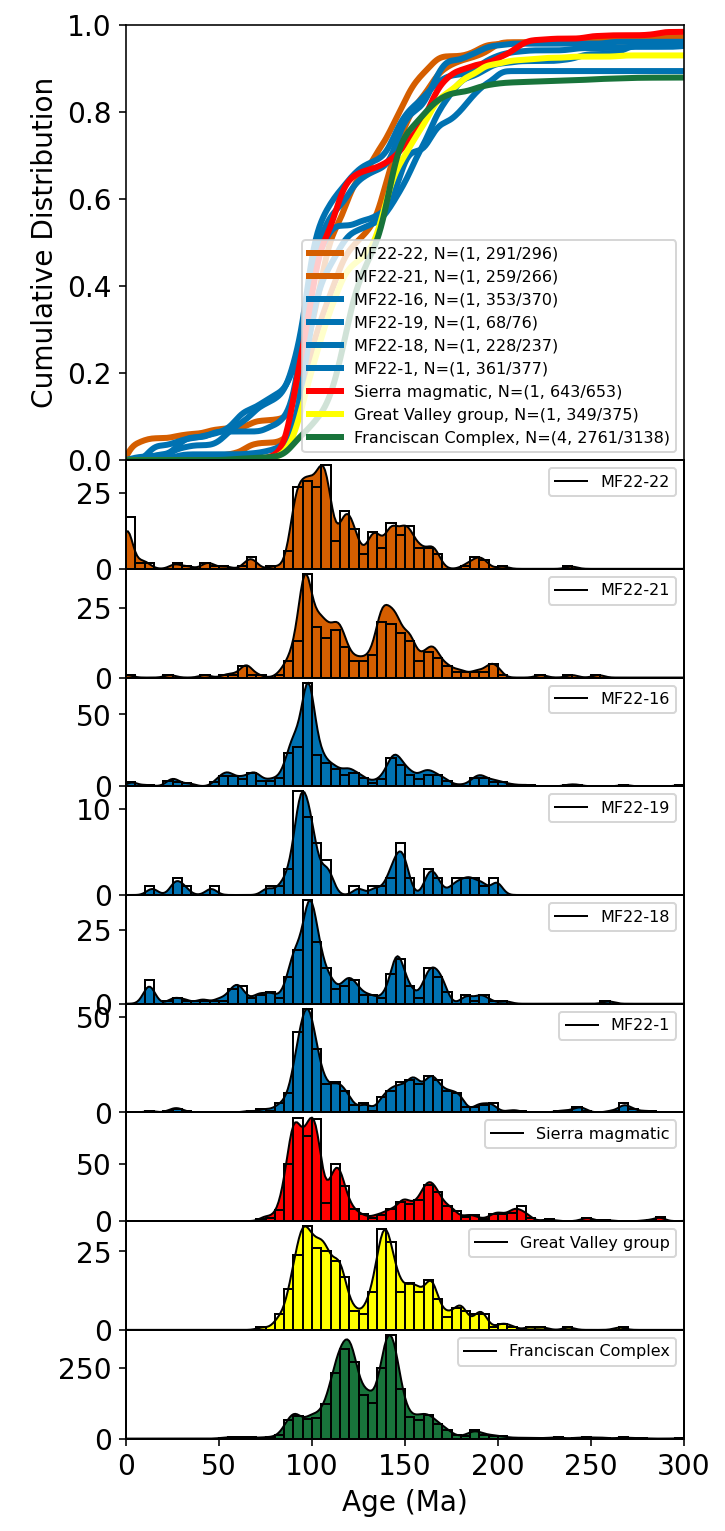

In [41]:
# Enter plot options below
whatToPlot = 'both' # Options: cumulative, relative, or both
separateSubplots = True # Set to True to plot each relative age distribution in a separate subplot (allows histogram and pie)

# Specify the age range (Myr) that you want to plot
x1 = 0
x2 = 300

plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the plot dimensions
w = 6 # width of the plot
c = 4 # height of CDF panel
h = 10 # height of the relative panel (only required if separateSubplots is False). Options: 'auto' or an integer

# Specify the interval (Myr) over which distributions are calculated
xdif = 1 # Note: an interval of 1 Myr is recommended

# Cumulative distribution options
plotCDF = False # Plot the CDF discretized at xdif interval
plotCPDP = False # Plot the cumulative PDP
plotCKDE = True # Plot the cumulative KDE
plotDKW = False # Plot the 95% confidence interval of the CDF (Dvoretsky-Kiefer-Wolfowitz inequality)

# Relative distribution options
normPlots = False # Will normalize the PDP/KDE if equals True (if separateSubplots is True)

plotKDE = True # Set to True if want to plot KDE
colorKDE = True # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = False # Will color KDE according to age populations if set to True
bw = 5 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

plotPDP = False # Set to True if want to plot PDP
colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = False # Will color PDP according to age populations if set to True

plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

plotHist = True # Set to True to plot a histogram (only available when separateSubplots is True)
b = 5 # Specify the histogram bin size (Myr)
bw = 3

plotPIE = False # Will plot a pie diagram (only available when separateSubplots is True)

# Specify  age categories for colored KDE, PDP, and/or pie plots
# Sharman et al. 2015 scheme
agebins = [0, 4500]
agebinsc = ['gainsboro']

plotAgePeaks = False # Will identify and plot age peaks
agePeakOptions = ['KDE', 0.05, 5, 2, True] # [distType, threshold, minDist, minPeakSize, labels]

colors = ['#d55e00', '#d55e00', '#0072b2', '#0072b2', '#0072b2', '#0072b2', 'red', 'yellow', '#18743b']


fig = dFunc.plotAll(sampleList, 
                    ages, 
                    errors, 
                    numGrains, 
                    labels, 
                    whatToPlot, 
                    separateSubplots, plotCDF, plotCPDP, plotCKDE, 
                    plotDKW, normPlots, plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotColorBar, 
                    plotHist, plotLog, plotPIE, x1, x2, b, bw, xdif, agebins, agebinsc, w, c, h, plotAgePeaks, agePeakOptions,
                    CDFlw=3, KDElw=1, PDPlw=1, colors=colors)

ylim_max_list = []
for ax in fig.axes:
    ax.yaxis.set_label_position("left")
    ax.yaxis.tick_left()
    ylim_min, ylim_max = ax.get_ylim()
    ylim_max_list.append(ylim_max)

plt.savefig('dz_distribution_plot.pdf')

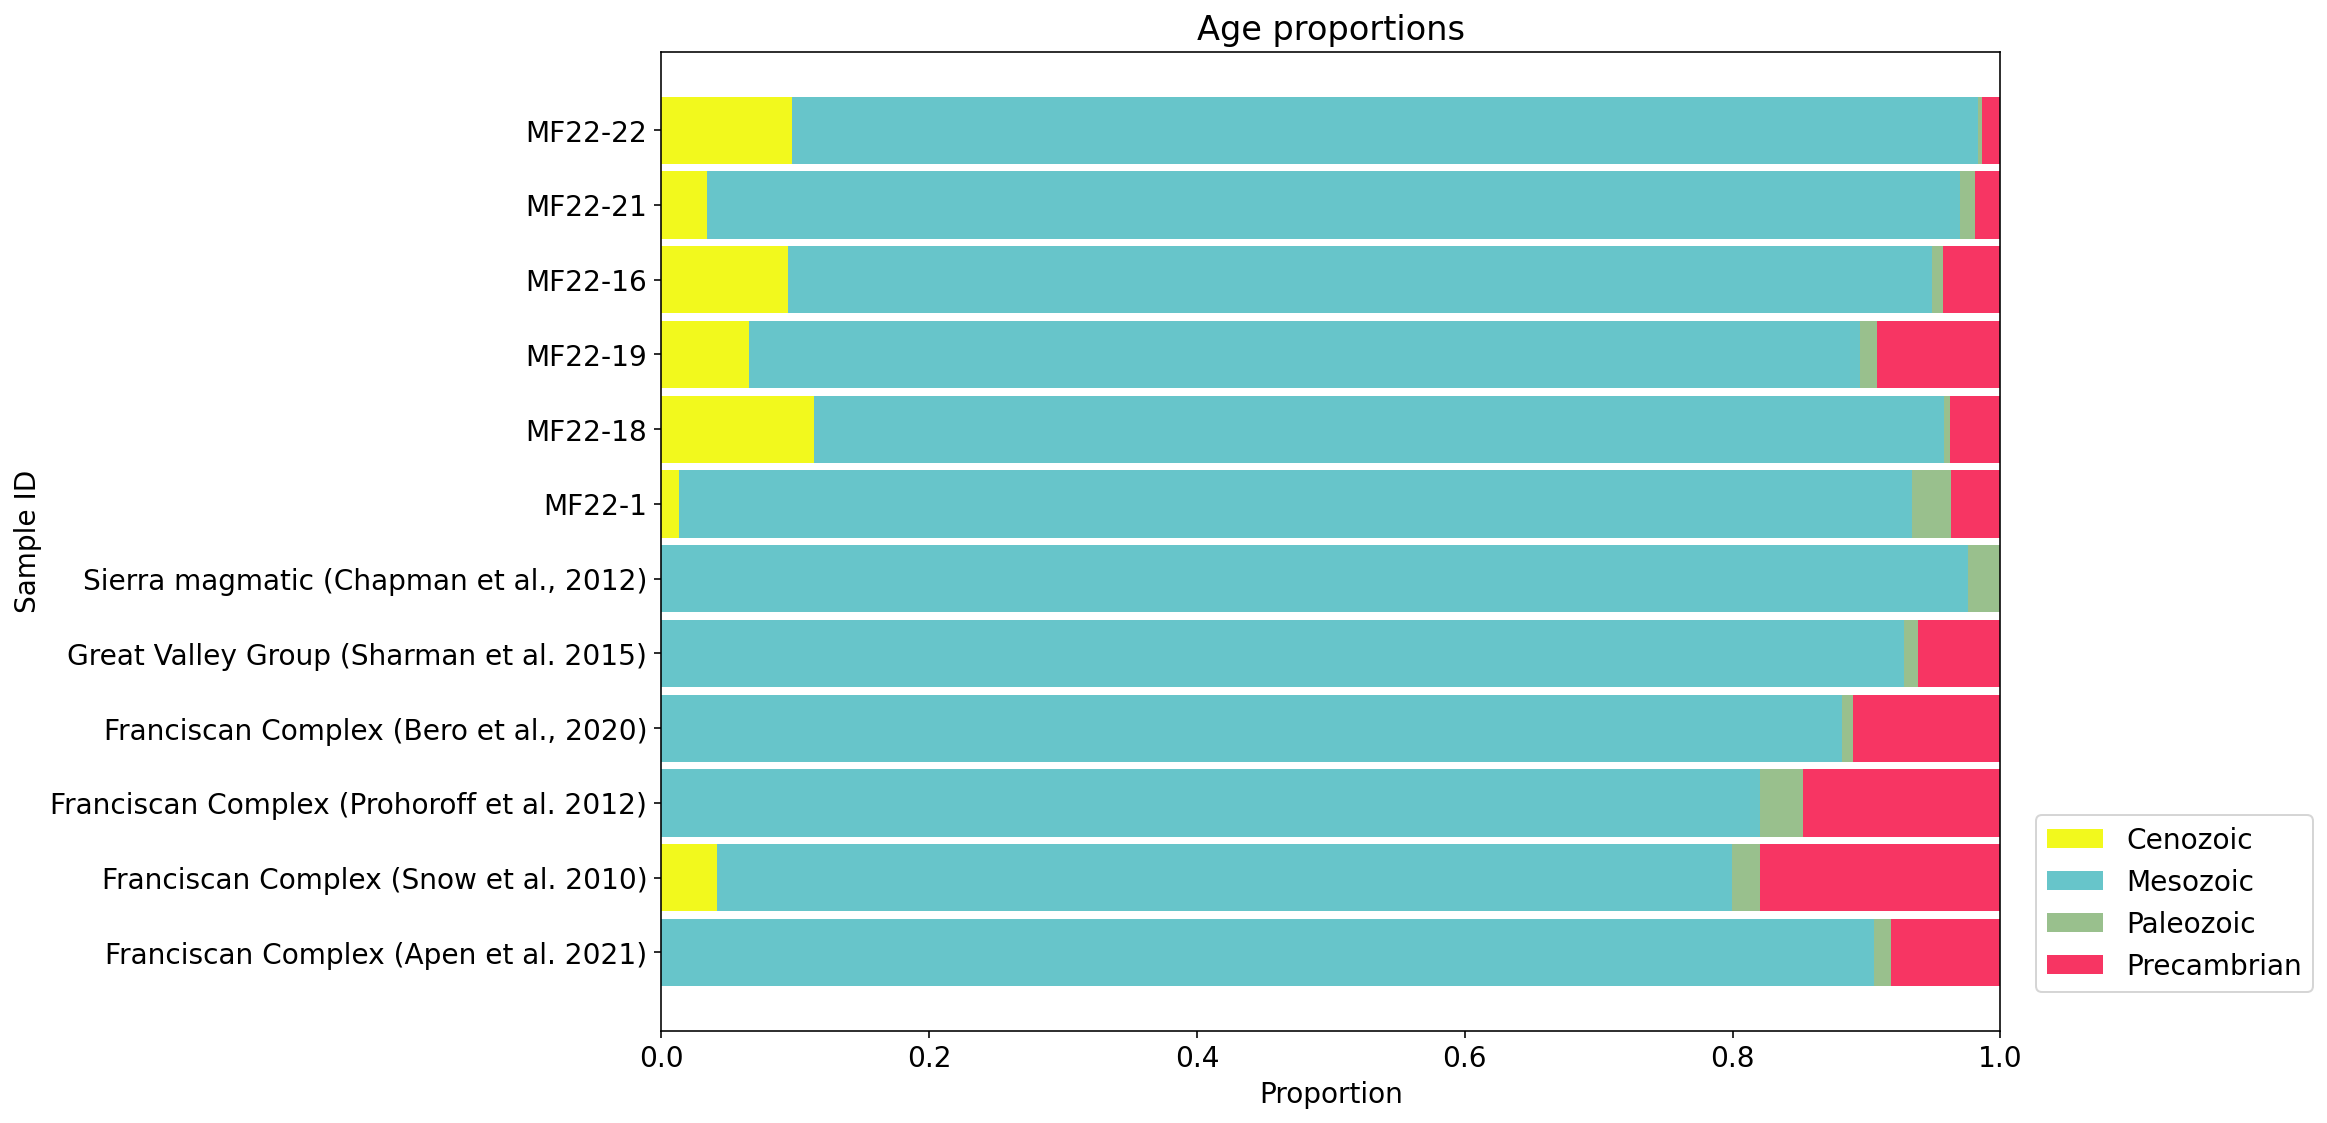

In [36]:
# Specify plot parameters
overlap = 0.9
width = 6
height = 0.75

# Specify  age population boundaries and colors
# Sharman et al. 2015 scheme
agebins = [0, 65, 252, 539, 4500]
agebinsc = [(242/255, 249/255, 29/255),(103/255, 197/255, 202/255),(153/255, 192/255, 141/255),(247/255, 53/255, 99/255)]

# Specify whether to separate grouped sample lists into individual samples
separateGroups = True # Set to True to separate groups into their individual samples

savePlot = False #Specify whether to save output plots as PDF files

figBar = dFunc.plotBar(width, height, overlap, main_byid_df, sampleList, ages, numGrains, labels, agebins, agebinsc, separateGroups, savePlot)


from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor=(242/255, 249/255, 29/255),label='Cenozoic'),
                   Patch(facecolor=(103/255, 197/255, 202/255),label='Mesozoic'),
                   Patch(facecolor=(153/255, 192/255, 141/255),label='Paleozoic'),
                   Patch(facecolor=(247/255, 53/255, 99/255),label='Precambrian')]

plt.gca().legend(handles=legend_elements, loc='center',bbox_to_anchor=(0.88, -0.12, 0.5, 0.5),fontsize=14)
plt.show()

### Multi-dimensional scaling

In [37]:
model = dFunc.MDS_class(ages, errors, labels, sampleList, metric=False, criteria='Vmax', bw='optimizedFixed', n_init='metric', 
                        max_iter=1000, x1=0, x2=4500, xdif=1, min_dim=1, max_dim=3, dim=2)

Final stress:  0.08163897152687125


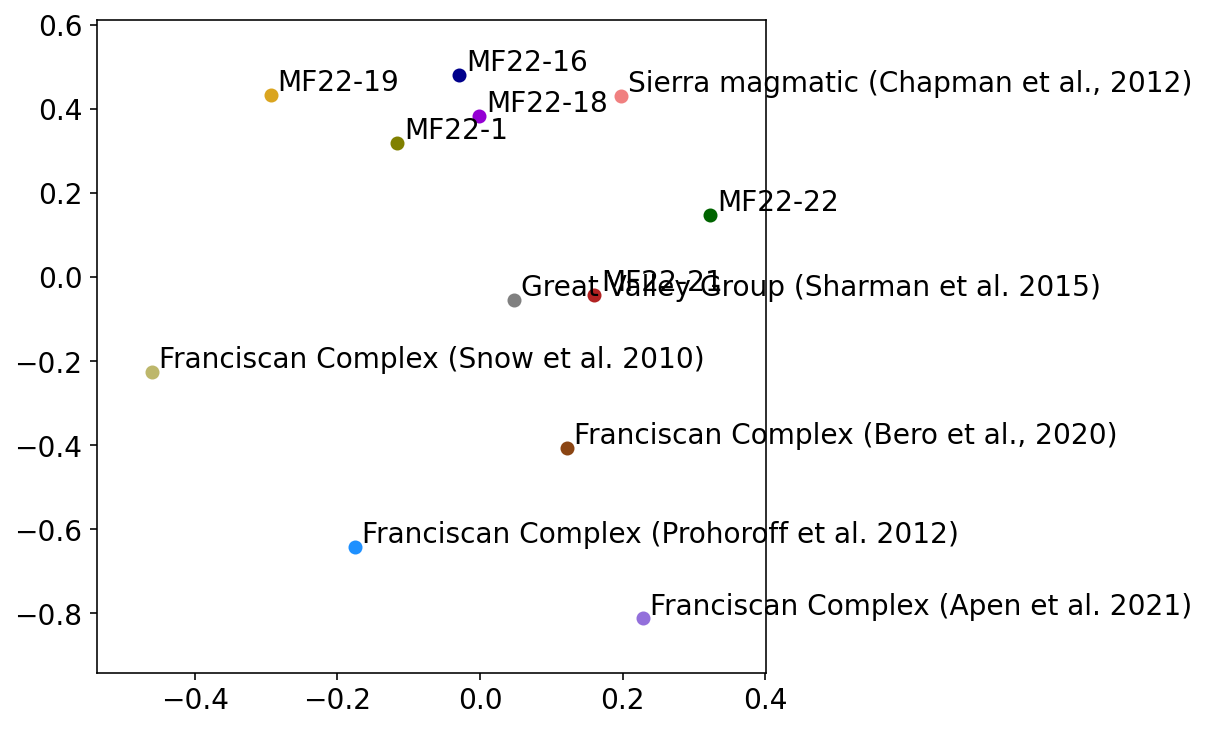

In [38]:
model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True, equalAspect=False, 
              stressType='sklearn')

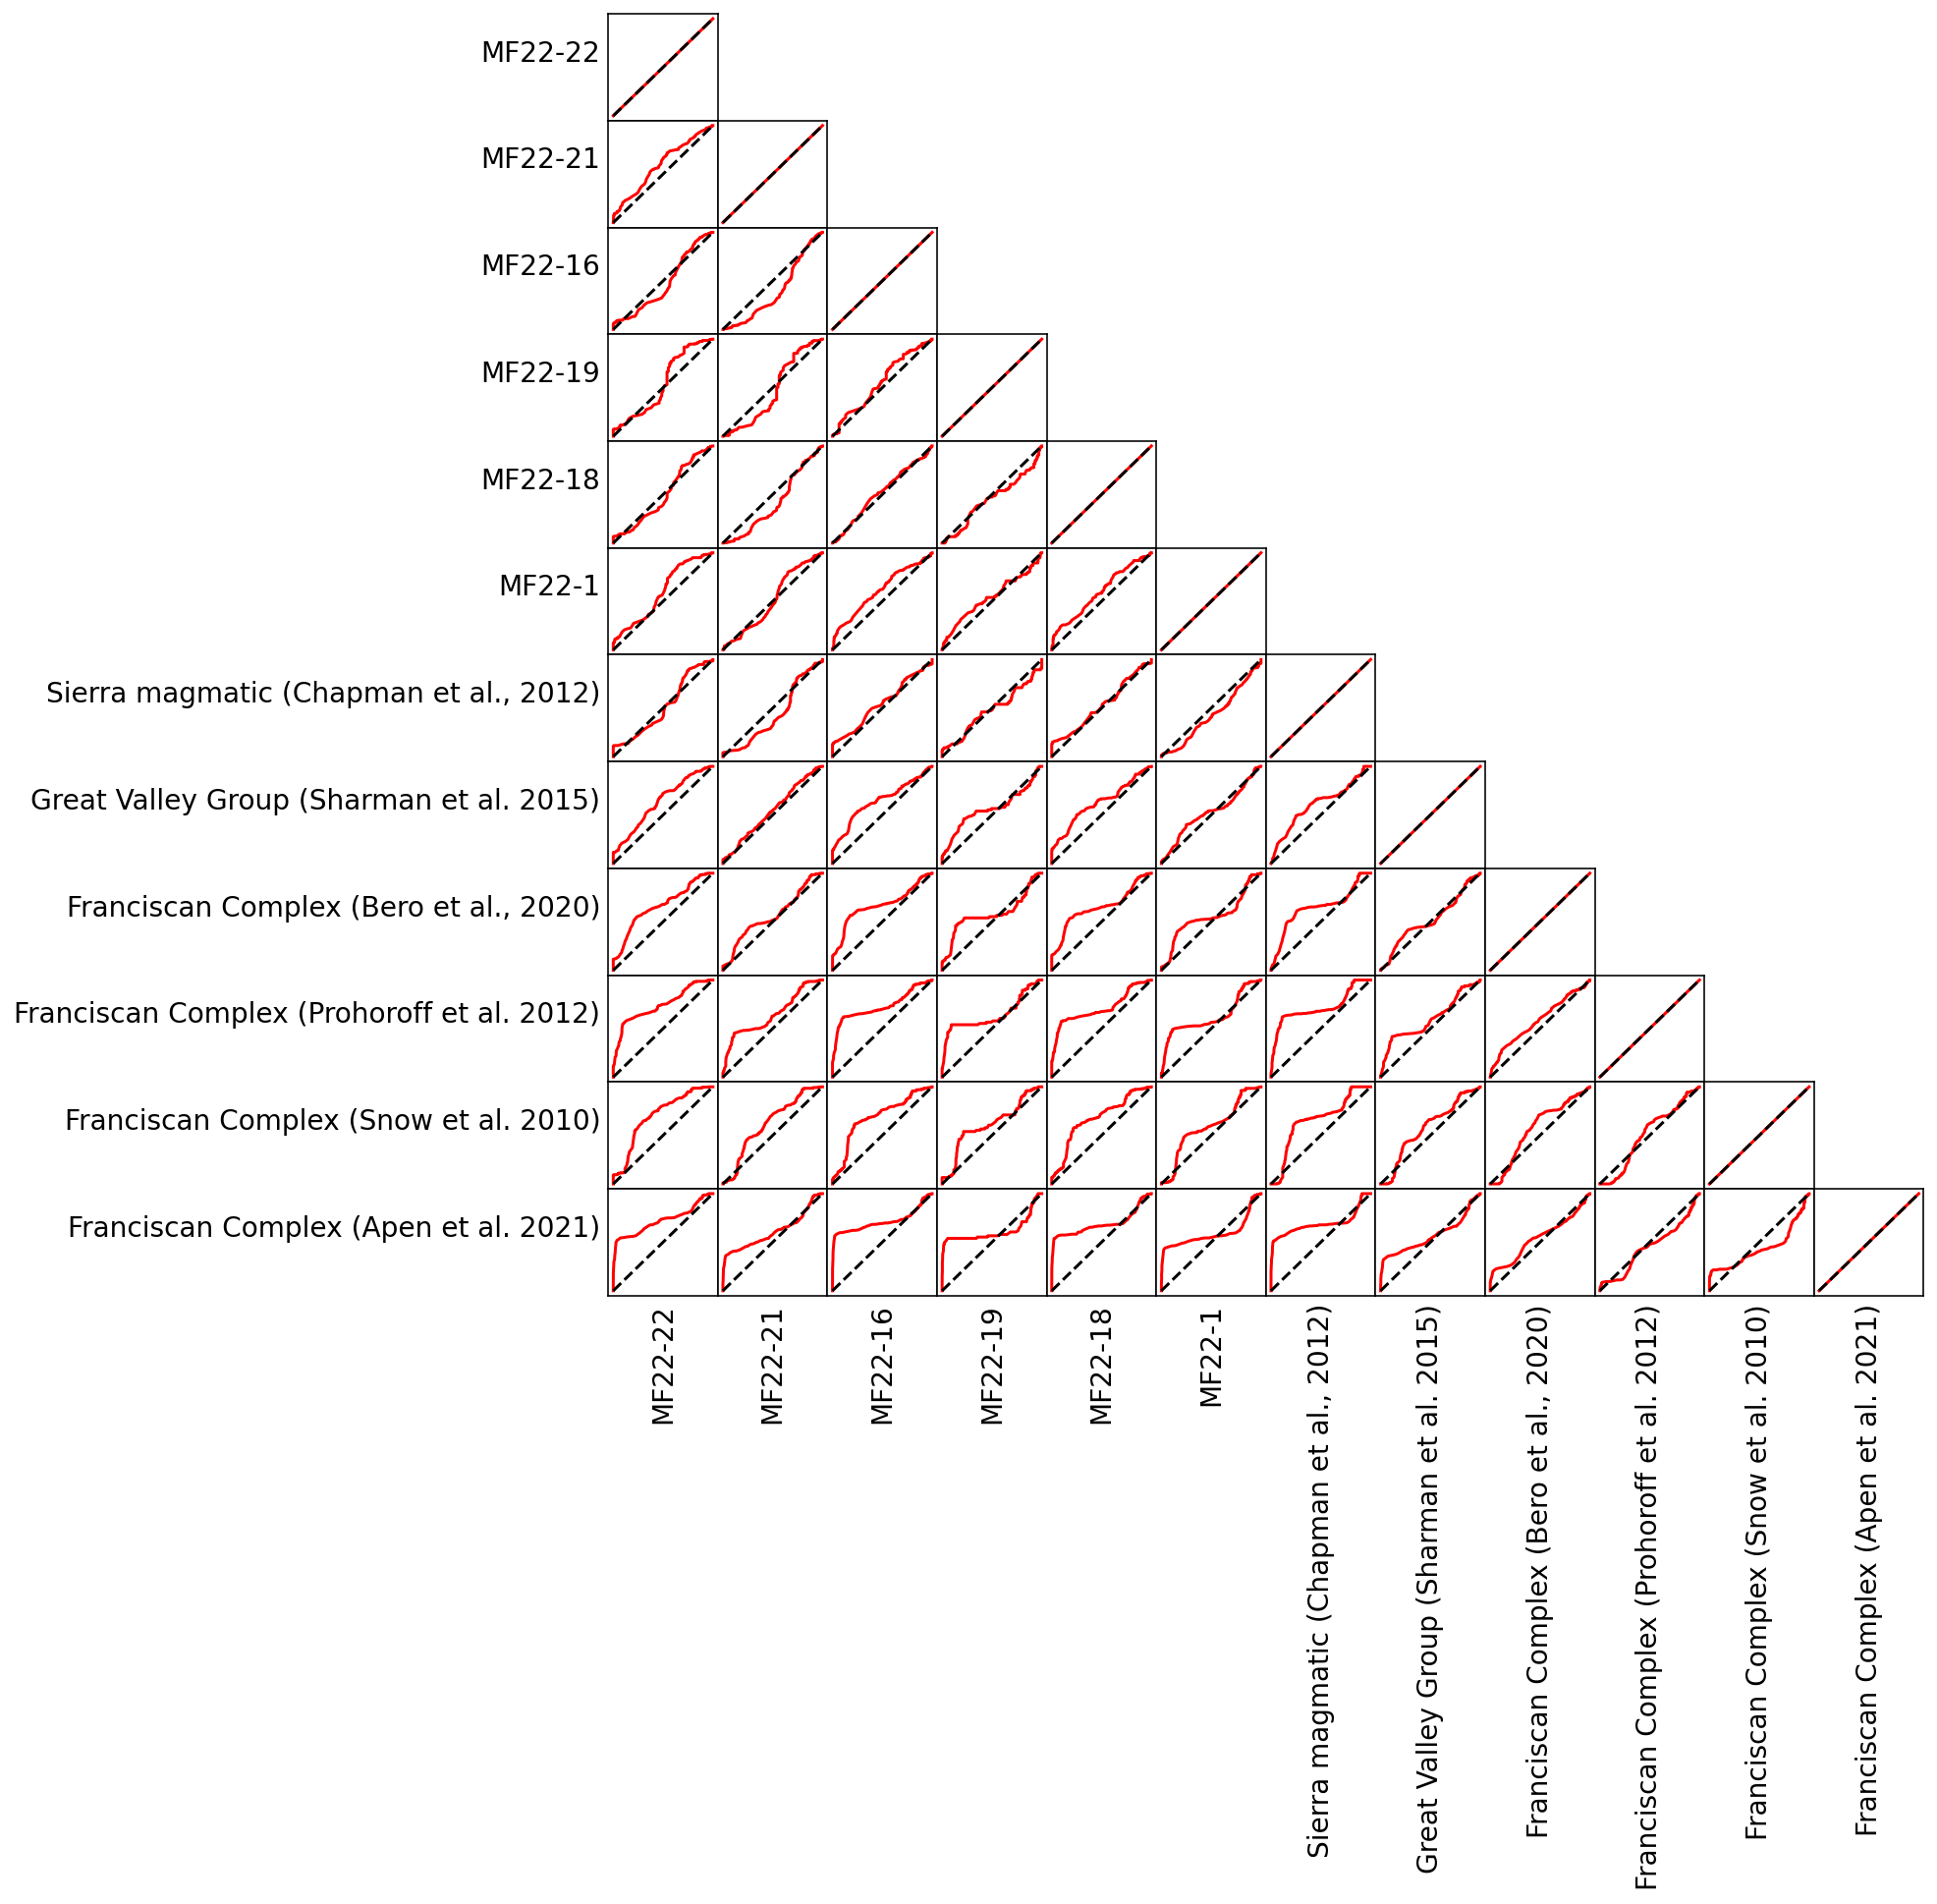

In [39]:
model.QQplot(figsize=(12,12), savePlot=False, fileName='QQplot.pdf', halfMatrix=True)

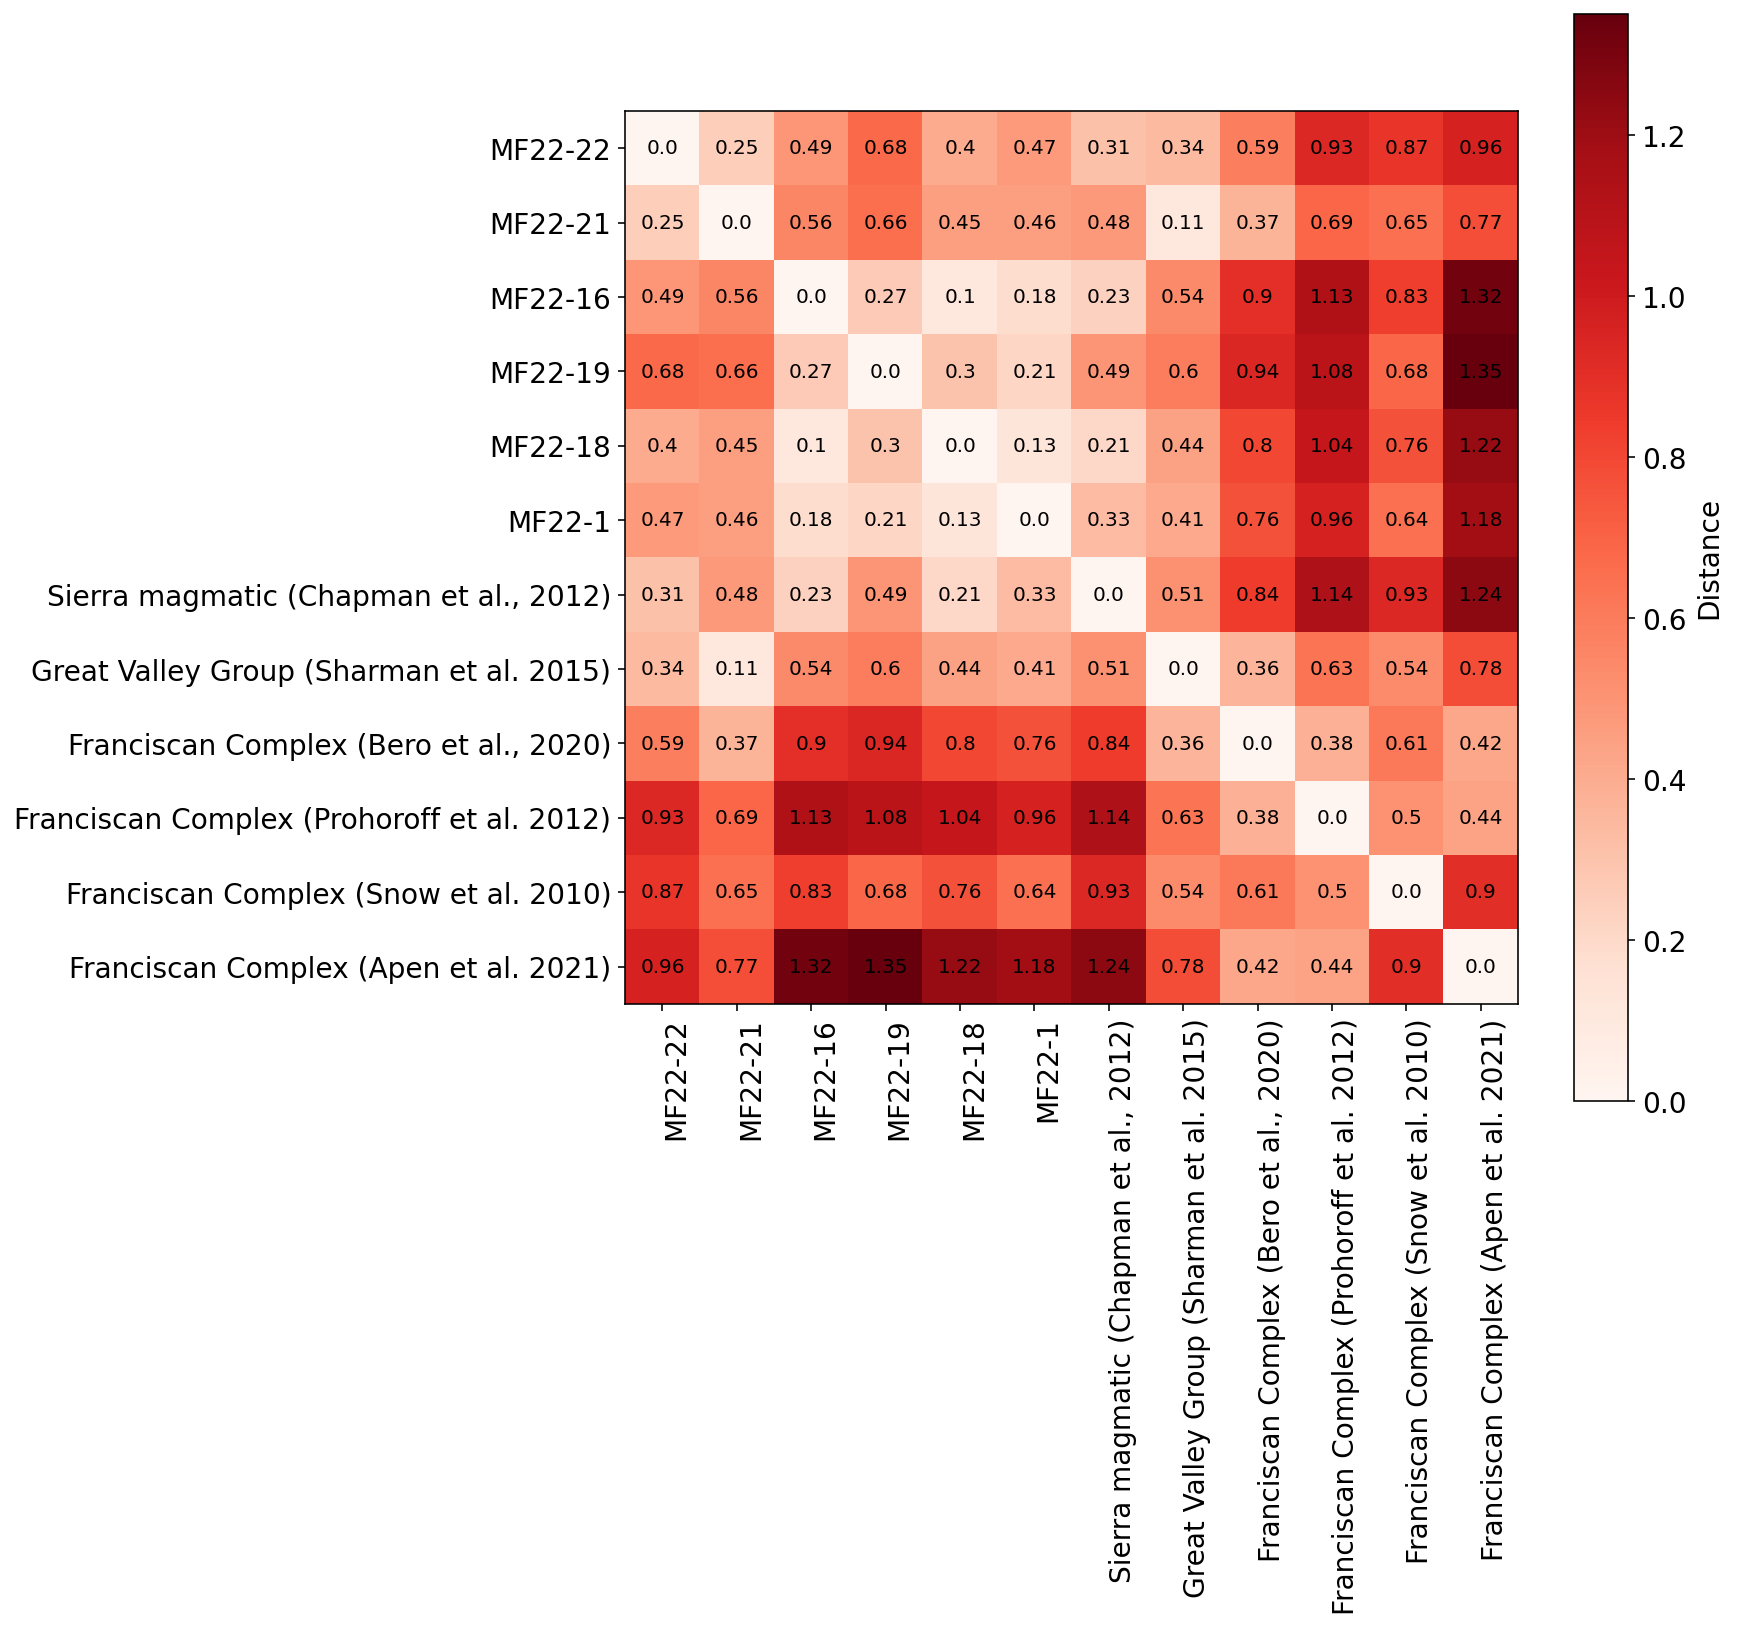

In [40]:
model.heatMap(figsize=(10,10), savePlot=False, fileName='HeatMapPlot.pdf', plotValues=True,
              plotType='distance', fontsize=10)

### Export sample comparisons and plot KDE cross-correlations

In [41]:
calculateSimilarity = True
calculateLikeness = True
calculateKS = True
calculateKuiper = True
calculateR2 = True
fileName = 'interSampleComparison.csv'

# Specify what type of relative distribution to compare for similarity, likeness, and cross-correlation calculations
distType = 'KDE' # Options are 'PDP' or 'KDE'
bw = 10 # Specify the bandwidth for the KDE distribution. Options are 'optimizedFixed','optimizedVariable', or a number (Ma)

dFunc.calcComparisonCSV(ages, errors, numGrains, labels, sampleList, calculateSimilarity, calculateLikeness,
                        calculateKS, calculateKuiper, calculateR2, fileName, distType, bw)

In [48]:
KDE_cross_correlation = pd.read_csv('./Output/interSampleComparison.csv', header=71)
KDE_cross_correlation

,Label,n,MF22-22,MF22-21,MF22-16,MF22-19,MF22-18,MF22-1,"Sierra magmatic (Chapman et al., 2012)",Great Valley Group (Sharman et al. 2015),"Franciscan Complex (Bero et al., 2020)",Franciscan Complex (Prohoroff et al. 2012),Franciscan Complex (Snow et al. 2010),Franciscan Complex (Apen et al. 2021)
0,MF22-22,296,1.000000,0.941079,0.893654,0.819495,0.922455,0.880189,0.872092,0.931485,0.842630,0.656081,0.657316,0.627652
1,MF22-21,266,0.941079,1.000000,0.836593,0.801090,0.892156,0.880489,0.798242,0.993118,0.895406,0.762566,0.830717,0.740461
2,MF22-16,370,0.893654,0.836593,1.000000,0.940497,0.976750,0.914276,0.951373,0.825348,0.621154,0.409151,0.533839,0.370920
3,MF22-19,76,0.819495,0.801090,0.940497,1.000000,0.936691,0.939161,0.929124,0.810423,0.544923,0.353175,0.507306,0.314364
4,MF22-18,237,0.922455,0.892156,0.976750,0.936691,1.000000,0.954646,0.938517,0.886318,0.681633,0.482033,0.624949,0.443622
5,MF22-1,377,0.880189,0.880489,0.914276,0.939161,0.954646,1.000000,0.947137,0.898110,0.656278,0.466092,0.602066,0.423407
6,"Sierra magmatic (Chapman et al., 2012)",653,0.872092,0.798242,0.951373,0.929124,0.938517,0.947137,1.000000,0.810762,0.591899,0.371338,0.457322,0.326670
7,Great Valley Group (Sharman et al. 2015),375,0.931485,0.993118,0.825348,0.810423,0.886318,0.898110,0.810762,1.000000,0.889958,0.754848,0.815082,0.726602
8,"Franciscan Complex (Bero et al., 2020)",1273,0.842630,0.895406,0.621154,0.544923,0.681633,0.656278,0.591899,0.889958,1.000000,0.942221,0.815896,0.915521
9,Franciscan Complex (Prohoroff et al. 2012),379,0.656081,0.762566,0.409151,0.353175,0.482033,0.466092,0.371338,0.754848,0.942221,1.000000,0.829647,0.980862


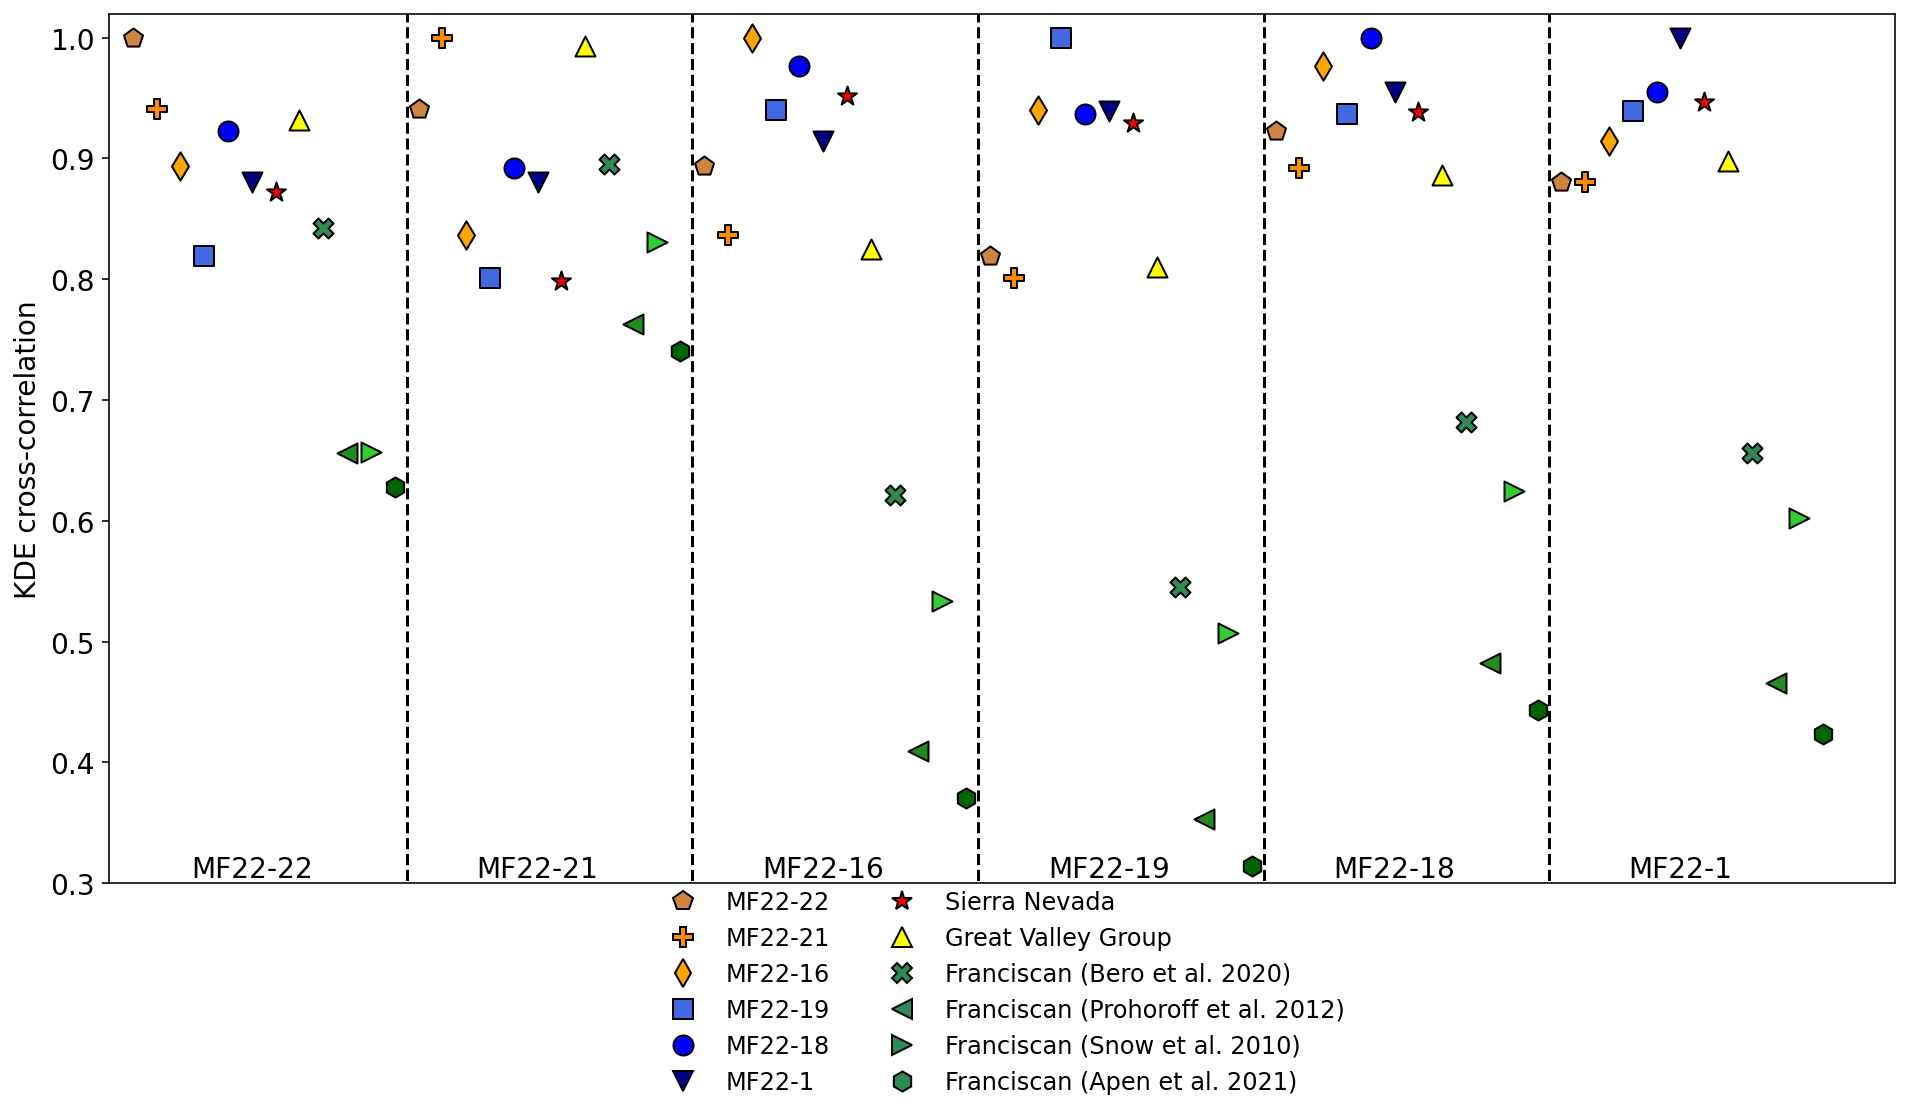

In [71]:
plt.figure(figsize=(16,8))
x = np.arange(1,73)

yvalues = KDE_cross_correlation['MF22-22'].tolist() + KDE_cross_correlation['MF22-21'].tolist() + KDE_cross_correlation['MF22-16'].tolist() + KDE_cross_correlation['MF22-19'].tolist()+ KDE_cross_correlation['MF22-18'].tolist()+ KDE_cross_correlation['MF22-1'].tolist()
y = yvalues

facecolor = colors*6

markers = ['p','P','d','s','o','v','*','^','X','<','>','h']*6

for xp, yp, fc, m in zip(x, y, facecolor, markers):
    plt.scatter(xp, yp, 
                facecolor = fc,
                marker=m, 
                edgecolor= 'black',
                s=100)

plt.ylabel('KDE cross-correlation',fontsize=14)

legend_elements = [Line2D([0], [0], marker='p', color='black', label='MF22-22',
                          markerfacecolor=colors[0], markersize=10, linestyle='none'),
                    Line2D([0], [0], marker='P', color='black', label='MF22-21',
                                          markerfacecolor=colors[1], markersize=10, linestyle='none'),
                    Line2D([0], [0], marker='d', color='black', label='MF22-16',
                                          markerfacecolor=colors[2], markersize=10, linestyle='none'),
                    Line2D([0], [0], marker='s', color='black', label='MF22-19',
                          markerfacecolor=colors[3], markersize=10, linestyle='none'),
                   Line2D([0], [0], marker='o', color='black', label='MF22-18',
                          markerfacecolor=colors[4], markersize=10, linestyle='none'),
                   Line2D([0], [0], marker='v', color='black', label='MF22-1',
                          markerfacecolor=colors[5], markersize=10, linestyle='none'),
                   Line2D([0], [0], marker='*', color='black', label='Sierra Nevada',
                          markerfacecolor=colors[6], markersize=10, linestyle='none'),
                   Line2D([0], [0], marker='^', color='black', label='Great Valley Group',
                          markerfacecolor=colors[7], markersize=10, linestyle='none'),
                   Line2D([0], [0], marker='X', color='black', label='Franciscan (Bero et al. 2020)',
                          markerfacecolor=colors[8], markersize=10, linestyle='none'),
                   Line2D([0], [0], marker='<', color='black', label='Franciscan (Prohoroff et al. 2012)',
                          markerfacecolor=colors[8], markersize=10, linestyle='none'),
                   Line2D([0], [0], marker='>', color='black', label='Franciscan (Snow et al. 2010)',
                          markerfacecolor=colors[8], markersize=10, linestyle='none'),
                   Line2D([0], [0], marker='h', color='black', label='Franciscan (Apen et al. 2021)',
                          markerfacecolor=colors[8], markersize=10, linestyle='none')
                  ]

plt.xticks([])
plt.ylim(0.3,1.02)
plt.xlim(0,75)
plt.vlines(12.5,0,1.1,color='black',linestyle='--')
plt.vlines(24.5,0,1.1,color='black',linestyle='--')
plt.vlines(36.5,0,1.1,color='black',linestyle='--')
plt.vlines(48.5,0,1.1,color='black',linestyle='--')
plt.vlines(60.5,0,1.1,color='black',linestyle='--')
plt.annotate('MF22-22',(6,0.3),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('MF22-21',(18,0.3),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('MF22-16',(30,0.3),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('MF22-19',(42,0.3),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('MF22-18',(54,0.3),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('MF22-1',(66,0.3),horizontalalignment='center',verticalalignment='bottom')
plt.gca().legend(handles=legend_elements, ncol=2, loc='center',
                 bbox_to_anchor=(0.25, -0.375, 0.5, 0.5),fontsize=12,frameon=False)
plt.show()